In [2]:
import pandas as pd

df = pd.read_csv('global_food_prices_cleaned_scaled.csv')
print(df.info())
print(df.head())
       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699204 entries, 0 to 1699203
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   country           object 
 1   region            object 
 2   market            object 
 3   commodity         object 
 4   currency          object 
 5   price_type        object 
 6   unit              object 
 7   month             float64
 8   year              float64
 9   price             float64
 10  commodity_source  float64
dtypes: float64(4), object(7)
memory usage: 142.6+ MB
None
       country      region    market       commodity currency price_type unit  \
0  Afghanistan  Badakhshan  Fayzabad  Bread - Retail      AFN     Retail   KG   
1  Afghanistan  Badakhshan  Fayzabad  Bread - Retail      AFN     Retail   KG   
2  Afghanistan  Badakhshan  Fayzabad  Bread - Retail      AFN     Retail   KG   
3  Afghanistan  Badakhshan  Fayzabad  Bread - Retail      AFN     Retail   KG   
4  Afghanistan  Bada

In [3]:
target = 'price'
features = df.drop(columns=[target])


In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [5]:
#Identify High-Cardinality Columns
df.select_dtypes(include='object').nunique().sort_values(ascending=False)


market        2970
commodity      757
region         605
unit           118
country         95
currency        81
price_type       4
dtype: int64

In [6]:
#Drop or Group Columns 
top_markets = df['market'].value_counts().nlargest(50).index
df['market'] = df['market'].where(df['market'].isin(top_markets), 'Other')


In [7]:
#Use OrdinalEncoder or LabelEncoder instead of get_dummies()

from sklearn.preprocessing import OrdinalEncoder

categorical_cols = df.select_dtypes(include='object').columns.tolist()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('price', axis=1)
y = df['price']



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [12]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


Intercept: 0.00011969005596031502
Coefficients: [ 0.02586426 -0.16303611  0.10141545 -0.0143998  -0.09510498  0.07792463
 -0.00449484 -0.0027975   0.13223015  0.        ]


In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=20)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

rf = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)
rf.fit(X_train_reduced, y_train)


C:\Users\USER\anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [14]:

# Predict on the test set
y_pred = rf.predict(X_test_reduced)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.28
R² Score: 0.7202


In [15]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
y_pred_lr = lr.predict(X_test_scaled)
print("LR RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("LR R2:", r2_score(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RF R2:", r2_score(y_test, y_pred_rf))

# Decision Tree
y_pred_dt = dt.predict(X_test)
print("DT RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("DT R2:", r2_score(y_test, y_pred_dt))


C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


LR RMSE: 0.9630828704183191
LR R2: 0.07040030579016021


C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RF RMSE: 0.5283968245612616
RF R2: 0.7201733628771574
DT RMSE: 0.22753643427727774
DT R2: 0.9481115675115204


C:\Users\USER\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


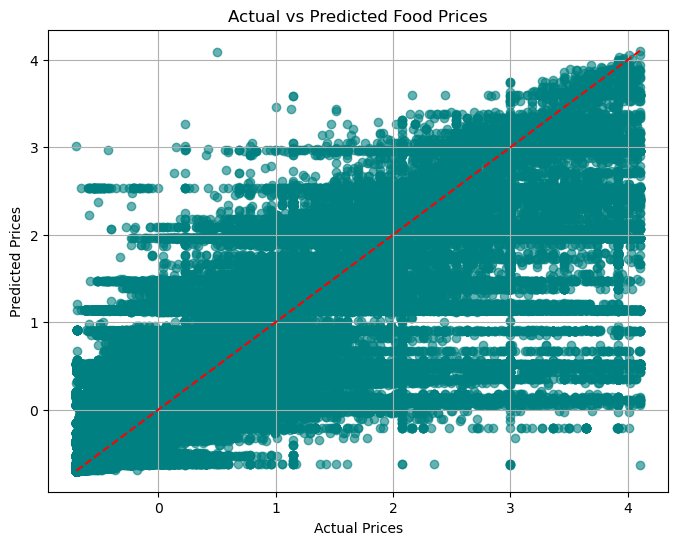

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Food Prices")
plt.grid(True)
plt.show()


In [18]:
import pandas as pd
import numpy as np

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Create a mapping of original feature names to selected ones
selected_feature_names = X_train.columns[selected_indices]

# Get feature importances
importances = rf.feature_importances_

# Sort and plot
feat_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance_df.head(10))  # Top 10 important features


            Feature  Importance
4          currency    0.432304
0           country    0.220446
3         commodity    0.127370
6              unit    0.078687
1            region    0.077064
8              year    0.052450
5        price_type    0.010603
2            market    0.000550
7             month    0.000527
9  commodity_source    0.000000


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression predictions & evaluation
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest (on all features) predictions & evaluation
y_pred_rf_all = rf.predict(X_test_reduced)
mse_rf_all = mean_squared_error(y_test, y_pred_rf_all)
r2_rf_all = r2_score(y_test, y_pred_rf_all)

# Print results
print("Model Evaluation Results:")
print(f"Linear Regression -> MSE: {mse_lr:.2f}, R²: {r2_lr:.4f}")
print(f"Random Forest (Reduced Features) -> MSE: {mse_rf_all:.2f}, R²: {r2_rf_all:.4f}")
   

Model Evaluation Results:
Linear Regression -> MSE: 0.93, R²: 0.0704
Random Forest (Reduced Features) -> MSE: 0.28, R²: 0.7202


C:\Users\USER\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


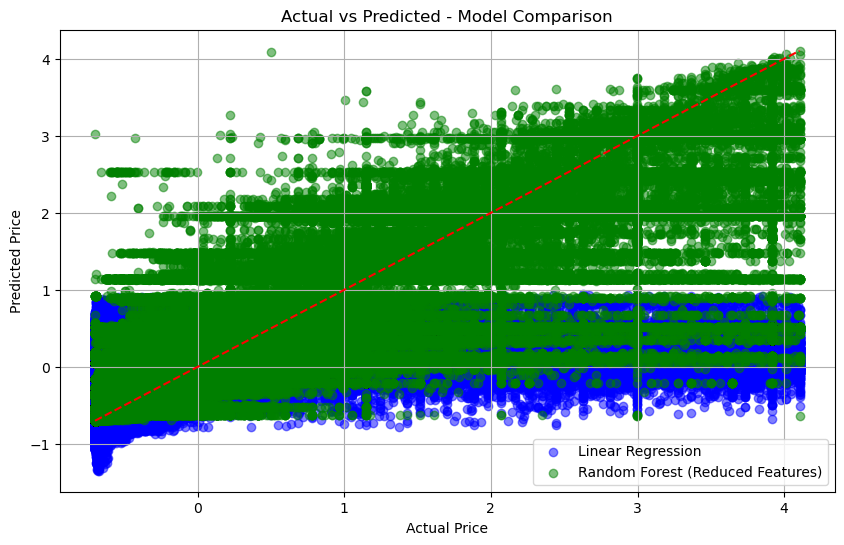

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf_all, color='green', alpha=0.5, label="Random Forest (Reduced Features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Model Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 11.2 MB/s eta 0:00:14
    --------------------------------------- 3.7/150.0 MB 10.9 MB/s eta 0:00:14
   - -------------------------------------- 6.3/150.0 MB 10.7 MB/s eta 0:00:14
   -- ------------------------------------- 8.4/150.0 MB 10.6 MB/s eta 0:00:14
   -- ------------------------------------- 10.7/150.0 MB 10.6 MB/s eta 0:00:14
   --- ------------------------------------ 13.1/150.0 MB 10.7 MB/s eta 0:00:13
   --- ------------------------------------ 14.7/150.0 MB 10.4 MB/s eta 0:00:14
   ---- ----------------------------------- 16.5/150.0 MB 10.2 MB/s eta 0:00:14
   ---- ----------------------------------- 18.1/150.0 MB 9.8 MB/s eta 0:00:14
   ---- ----------------------------------- 18.6/150.0 MB 9.6 MB/s eta 0:00:14
   ----- ---------------------------------- 19.1/150.0 MB 8.4 MB/s eta 0:00:16
   ----- ---------------------------------- 19.7/150.0 

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for XGBoost (same top 20 features from SelectKBest)
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_reduced)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.4f}")


XGBoost Regressor Evaluation:
Mean Squared Error (MSE): 0.17
R-squared (R²): 0.8317


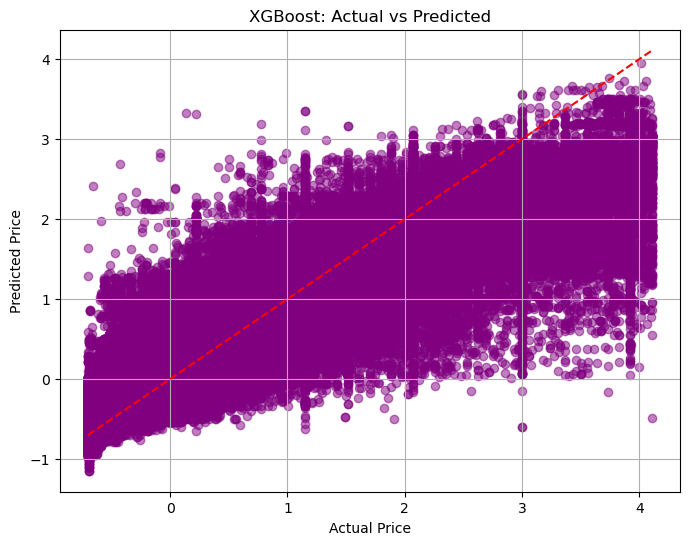

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.show()
